# Exercício - 02
- Criar uma cosmologia com Dark Energy
- Montar a equação da distância comóvel, distância própria e distancia luminosa
- Criar um objeto de distância com a biblioteca NumCosmo
- Utiliza este objeto para realizar os cálculos e montar os gráficos de distância
- Montar gráficos diferentes, em função do parâmetro de Hubble

## 1º - Importar bibliotecas e montar a NumCosmo

In [20]:
#------------------ BIBLIOTECAS ------------------ 

try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

from gi.repository import GObject
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm

import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline
import math
plt.rcParams['text.usetex'] = True

import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import FloatSlider

#------------------ COMANDO INICIAL ------------------ 


Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

#--------------- DICIONÁRIO DE CORES -----------------


cores = {'pr': '\033[30m',
         'vm': '\033[31m', 
         'lm': '\033[32m',
         'am': '\033[33m',
         'az': '\033[34m',
         'mg': '\033[35m',
         'cn': '\033[36m',
         'lp': '\033[m'}

## 2º Equações para distâncias

### 2.1 - Distância Comóvel 

Para um fóton que viaja em uma geodésica nula entre dois pontos, ao colocar seu movimento na direção radial, temos que:

$$a(t)dr = cdt$$

$$r(t_o) = c\int_{t_e}^{t_o}\frac{dt}{a(t)}$$

Pelas mudanças de variável, é possível mostrar que:

$$r(t_o) = \frac{c}{a(t_o)H_0}\int_{0}^{z}\frac{dt}{E(z)}$$

Substituindo E(z) pela equação de Friedmann, obtêm-se:

$$r(t_o) = \frac{c}{a(t_o)H_0}\int_{0}^{z}\frac{dz}{\sqrt{(1+z)^3\Omega_{m,0} +(1+z)^4\Omega_{r,0} + \Omega_{\lambda,0} + (1+z)^2\Omega_{\kappa,0}}}$$

### 2.2 - Distância Própria

Para a distância própria, será necessário somente multiplicar a distância comóvel pelo fator de escala no momento de observação. Sendo assim, se $a(t_o)$ no momento atual for igual a 1, a distância comóvel é igual à distância própria atualmente, mas seus valores divergem conforme se mede no passado.

$$D_p(t_o) = r(t_o)a(t_o)$$

$$D_p(t_o) = \frac{c}{H_0}\int_{0}^{z}\frac{dz}{\sqrt{(1+z)^3\Omega_{m,0} +(1+z)^4\Omega_{r,0} + \Omega_{\lambda,0} + (1+z)^2\Omega_{\kappa,0}}}$$

### 2.3 - Distância Luminosa

A distância luminosa é dada por:

$$D_L(t) = (1 + z)D_p(t)$$

## 3º Montando o modelo cosmológico

Agora será necessário criar um objeto a partir de alguma classe de cosmologia. Para esse exercício, escolhi o modelo DEXcdm, ou seja, com a presença de Dark Energy(DE) que possui equação de estado constante(X) e fator de matéria sendo composto, principalmente, por matéria escura fria(cdm).


In [21]:
cosmo = Nc.HICosmoDEXcdm.new()
set1 = Ncm.MSet.new_array ([cosmo])
set1.pretty_log ()

#----------------------------------------------------------------------------------
# Model[03000]:
#   - NcHICosmo : XCDM - Constant EOS
#----------------------------------------------------------------------------------
# Model parameters
#   -      H0[00]:  67.36               [FIXED]
#   -  Omegac[01]:  0.2568              [FIXED]
#   -  Omegax[02]:  0.7                 [FIXED]
#   - Tgamma0[03]:  2.7245              [FIXED]
#   -      Yp[04]:  0.24                [FIXED]
#   -    ENnu[05]:  3.046               [FIXED]
#   -  Omegab[06]:  0.0432              [FIXED]
#   -       w[07]: -1                   [FIXED]


A classe de distâncias é capaz de realizar os cálculos das integrais complicadas e fornecer diretamente o valor da distância para um certo valor de redshift. Para criar um objeto desta classe será necessário utilizar o seguinte comando:


In [22]:
distancia = Nc.Distance.new(5.0)
distancia.prepare(cosmo)

O parâmetro dentro do .new() indica que a função deve optimizar o cálculo até aquele valor de redshift. A segunda função utilizada prepara o cálculo de distância com os parâmetros do modelo especificado, neste caso,  os valores utilizados são os do "Pretty_log" acima.

## 4º Preparando os gráficos

Agora que as informações referentes ao modelo cosmológico estão prontas, podemos avançar para a criação de um gráfico da distância em função do redshift. Começarei preparando as listas de pontos com os parâmetros originais do "Pretty_log".

In [23]:
z_a = np.geomspace(0.5, 2, num=400)
comovel = np.array([distancia.comoving(cosmo, z) for z in z_a])* cosmo.RH_Mpc()
luminosidade = np.array([distancia.luminosity(cosmo, z) for z in z_a])* cosmo.RH_Mpc()
modulo = np.array([distancia.dmodulus(cosmo, z) + (5 * np.log10(cosmo.RH_Mpc()) ) for z in z_a])
# A função do objeto só calcula a integral, falta multiplica-la pelo raio de Hubble

Em seguida, será interessante criar uma função que prepare a formatação do gŕafico, para que não seja necessário repetir isso todas as vezes.

In [24]:
def prepare_graph():
    
    plt.figure(figsize=(12,9))
    plt.ylim (1.0e1, 6e3)
    plt.xlabel("Z", fontsize=30)
    plt.ylabel("r (Mpc)", fontsize=30)
    plt.tick_params(labelsize=20)
    plt.grid ()

Vamos montar o primeiro gráfico da distância luminosidade e distância comóvel com os parâmetros originais.

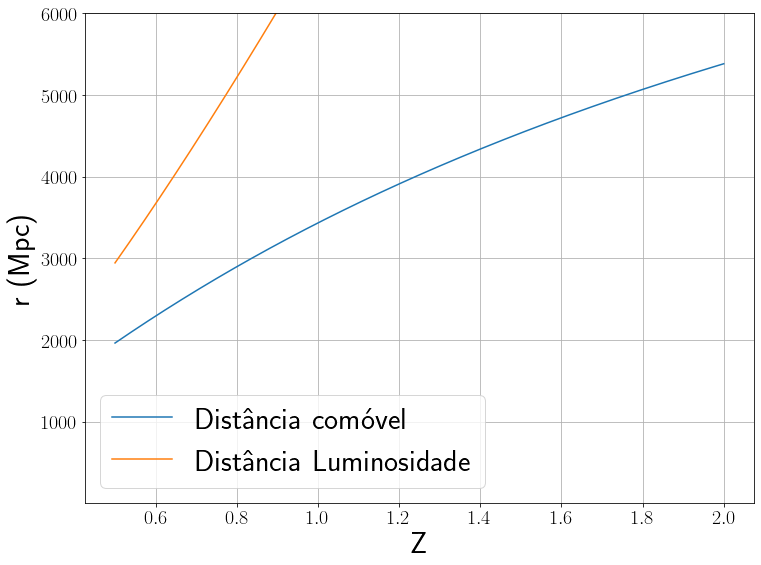

In [25]:
prepare_graph()
#plt.title("Distâncias em função do redshift", fontsize=30)
plt.plot(z_a, comovel, label="Distância comóvel")
plt.plot(z_a, luminosidade, label="Distância Luminosidade")
plt.legend(loc="best", fontsize=30)
#plt.savefig("comovel_luminosidade.pdf")
plt.show()

Agora, iremos variar alguns parâmetros importantes para verificar como a distância comóvel se modifica com relação a eles.

### 4.1 - Variando o valor da constante de Hubble

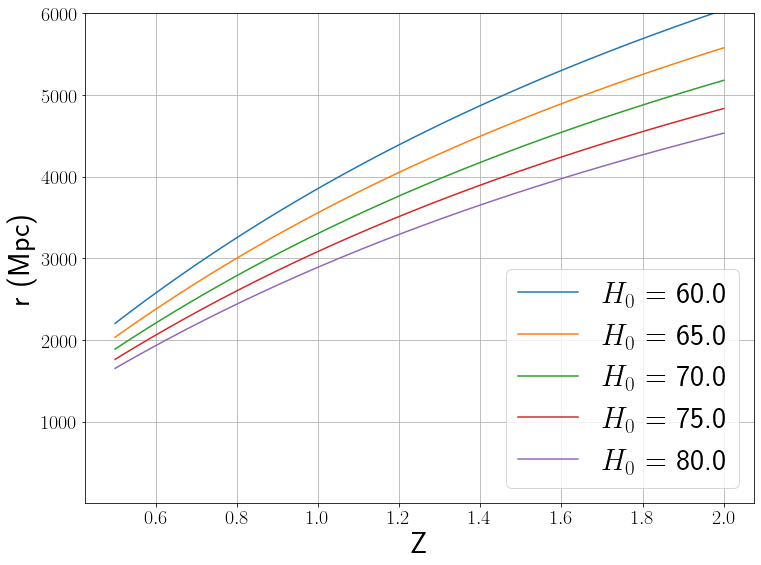

In [26]:
prepare_graph()
#plt.title(r"Distância Comóvel para diferentes valores de $H_0$", fontsize=30)
for i in range(600, 850, 50):
    
    cosmo.param_set_by_name("H0", i/10)
    distancia.prepare(cosmo)
    comovel = np.array([distancia.comoving(cosmo, z) for z in z_a])* cosmo.RH_Mpc()
    
    plt.plot(z_a, comovel, label=r"$H_0$"+ f" = {i/10}")

plt.legend(loc="best", fontsize=30)
#plt.savefig("d_h0.pdf")
plt.show()

cosmo.param_set_by_name("H0", 67.36) #Retorna a valor original

### 4.2 - Variando o valor de $\Omega_\Lambda$

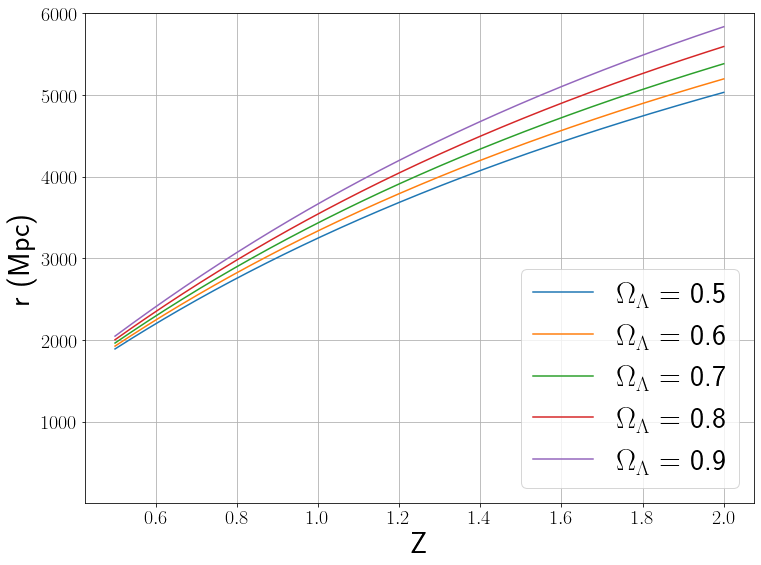

In [27]:
prepare_graph()
#plt.title(r"Distância Comóvel para diferentes valores de $\Omega_\Lambda$", fontsize=20)
for i in range(5, 10, 1):
    
    cosmo.param_set_by_name("Omegax", i/10)
    distancia.prepare(cosmo)
    comovel = np.array([distancia.comoving(cosmo, z) for z in z_a])* cosmo.RH_Mpc()
    
    plt.plot(z_a, comovel, label= r'$\Omega_{\Lambda}$ = ' + f"{i/10}")

plt.legend(loc="best", fontsize=30)
#plt.savefig("d_de.pdf")
plt.show()

cosmo.param_set_by_name("Omegax", 0.7) #Retorna a valor original

### 4.3 - Variando o valor de $w$

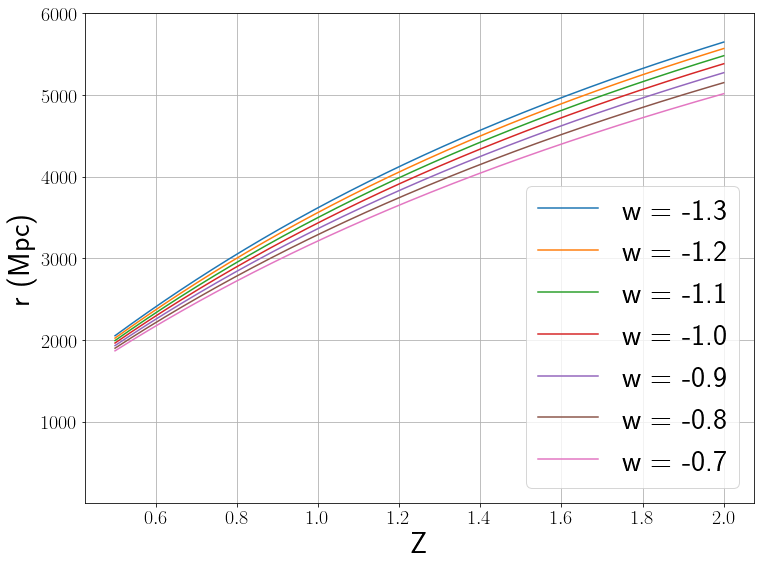

In [28]:
prepare_graph()
#plt.title(r"Distância Comóvel para diferentes valores de $w$", fontsize=20)
for i in range(-13, -6, 1):
    
    cosmo.param_set_by_name("w", i/10)
    distancia.prepare(cosmo)
    comovel = np.array([distancia.comoving(cosmo, z) for z in z_a])* cosmo.RH_Mpc()
    
    plt.plot(z_a, comovel, label=f'w = {i/10}')

plt.legend(loc="best", fontsize=30)
#plt.savefig("d_w.pdf")
plt.show()

cosmo.param_set_by_name("w", -1) #Retorna a valor original

### 4.4 - Variando a densidade de matéria escura 

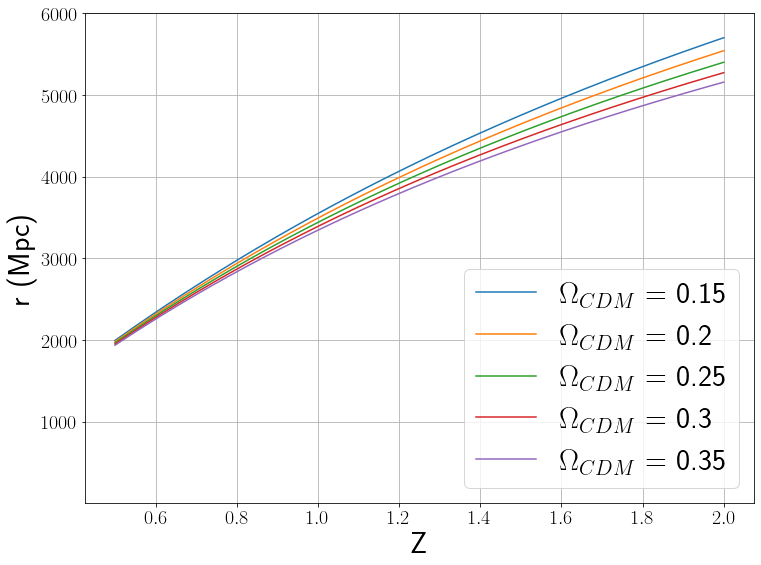

In [29]:
prepare_graph()
#plt.title(r"Distância Comóvel para diferentes valores de $\Omega_c$", fontsize=20)
for i in range(15, 40, 5):
    
    cosmo.param_set_by_name("Omegac", i/100)
    distancia.prepare(cosmo)
    comovel = np.array([distancia.comoving(cosmo, z) for z in z_a])* cosmo.RH_Mpc()
    
    plt.plot(z_a, comovel, label=r'$\Omega_{CDM}$ = ' + f"{i/100}")

plt.legend(loc="best", fontsize=30)
#plt.savefig("d_c.pdf")
plt.show()

cosmo.param_set_by_name("Omegac", 0.2568) #Retorna a valor original

### 4.4 - Variando a densidade de matéria bariônica 

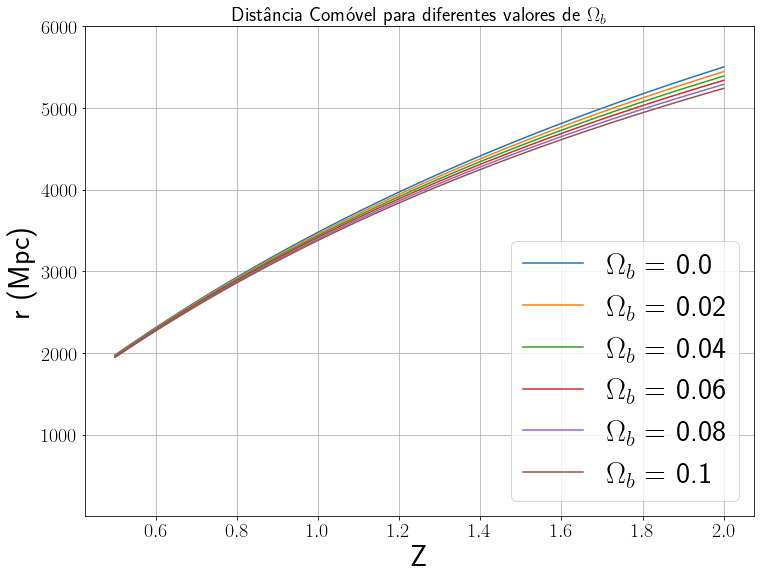

In [30]:
prepare_graph()
plt.title(r"Distância Comóvel para diferentes valores de $\Omega_b$", fontsize=20)
for i in range(0, 12, 2):
    
    cosmo.param_set_by_name("Omegab", i/100)
    distancia.prepare(cosmo)
    comovel = np.array([distancia.comoving(cosmo, z) for z in z_a])* cosmo.RH_Mpc()
    
    plt.plot(z_a, comovel, label=r'$\Omega_b$ = ' + f"{i/100}")

plt.legend(loc="best", fontsize=30)
#plt.savefig("d_b.pdf")
plt.show()

cosmo.param_set_by_name("Omegab", 0.0432) #Retorna a valor original

## 5º Gráficos do módulo de distância

In [31]:
z_a = np.geomspace(0.5, 2, num=400)
modulo = np.array([distancia.dmodulus(cosmo, z) + (5 * np.log10(cosmo.RH_Mpc()) ) for z in z_a])

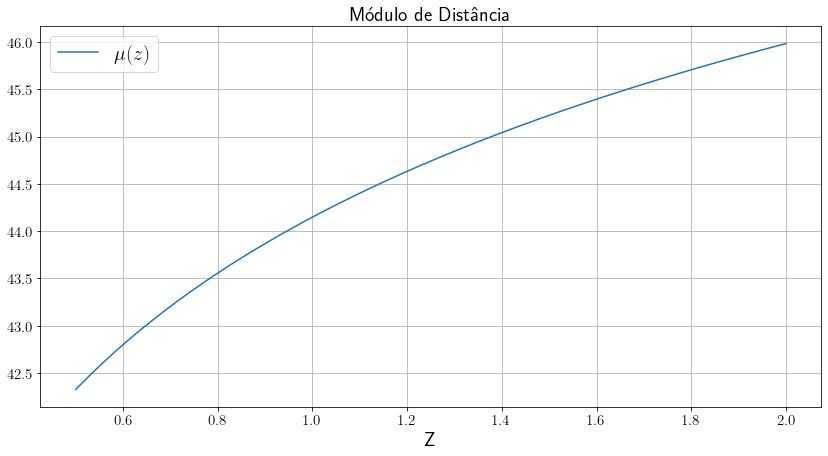

In [32]:
plt.figure(figsize=(14,7))
plt.title("Módulo de Distância", fontsize=20)

plt.plot(z_a, modulo, label=r"$\mu(z)$")
plt.xlabel("Z", fontsize=20)
plt.tick_params(labelsize=15)
plt.legend(loc="best", fontsize=20)
plt.grid ()
#plt.savefig("m.pdf")
plt.show ()


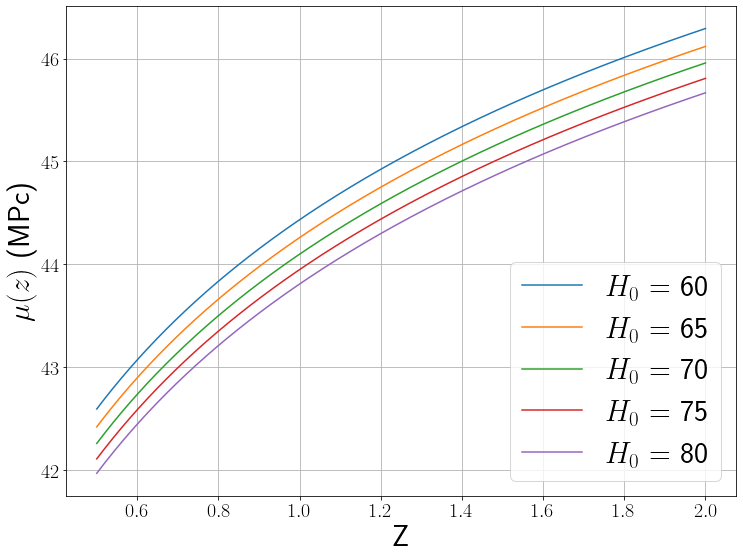

In [33]:
plt.figure(figsize=(12,9))
#plt.title(r"Módulo de Distância para diferentes valores de $H_0$", fontsize=20)
for i in range(60, 85, 5):
    
    cosmo.param_set_by_name("H0", i)
    distancia.prepare(cosmo)
    modulo = np.array([distancia.dmodulus(cosmo, z) + (5 * np.log10(cosmo.RH_Mpc()) ) for z in z_a])
    
    plt.plot(z_a, modulo, label= r"$H_0$"+ f" = {i}")

plt.xlabel("Z", fontsize=30)
plt.ylabel(r"$\mu(z)$ (MPc)", fontsize=30)
plt.tick_params(labelsize=20)
plt.legend(loc="best", fontsize=30)
plt.grid ()
#plt.savefig("m_h0.pdf")
plt.show()

cosmo.param_set_by_name("H0", 67.36) #Retorna a valor original

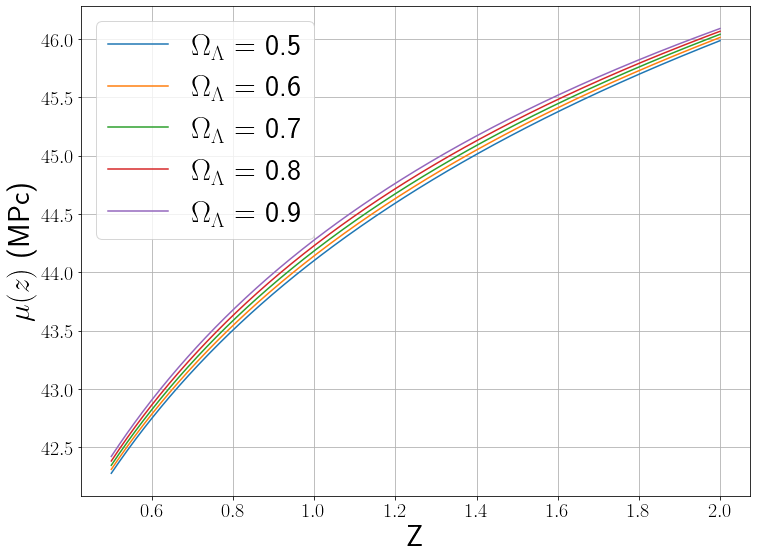

In [34]:
plt.figure(figsize=(12,9))
#plt.title(r"Módulo de Distância para diferentes valores de $\Omega_\Lambda$", fontsize=20)
for i in range(5, 10, 1):
    
    cosmo.param_set_by_name("Omegax", i/10)
    distancia.prepare(cosmo)
    modulo = np.array([distancia.dmodulus(cosmo, z) + (5 * np.log10(cosmo.RH_Mpc()) ) for z in z_a])
    
    plt.plot(z_a, modulo, label= r'$\Omega_{\Lambda}$ = ' + f"{i/10}")

plt.xlabel("Z", fontsize=30)
plt.ylabel(r"$\mu(z)$ (MPc)", fontsize=30)
plt.tick_params(labelsize=20)
plt.legend(loc="best", fontsize=30)
plt.grid ()
#plt.savefig("m_de.pdf")
plt.show()

cosmo.param_set_by_name("Omegax", 0.7) #Retorna a valor original

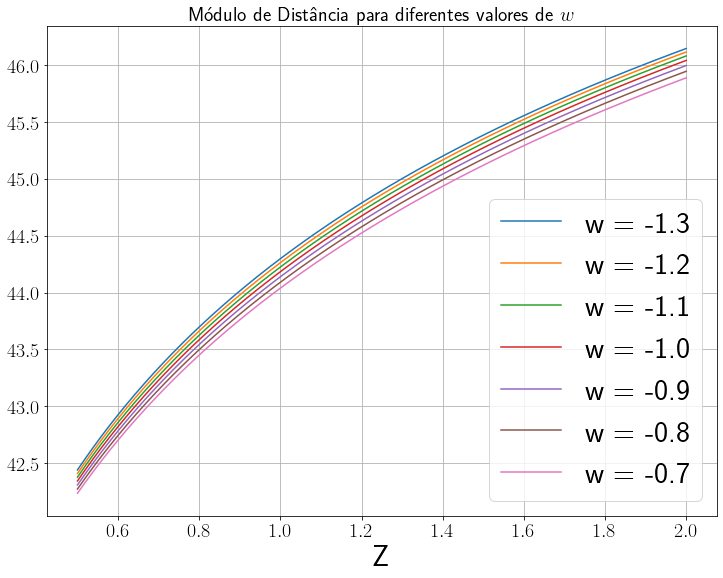

In [35]:
plt.figure(figsize=(12,9))
plt.title(r"Módulo de Distância para diferentes valores de $w$", fontsize=20)
for i in range(-13, -6, 1):
    
    cosmo.param_set_by_name("w", i/10)
    distancia.prepare(cosmo)
    modulo = np.array([distancia.dmodulus(cosmo, z) + (5 * np.log10(cosmo.RH_Mpc()) ) for z in z_a])
    
    plt.plot(z_a, modulo, label=f"w = {i/10}")

plt.xlabel("Z", fontsize=30)
plt.tick_params(labelsize=20)
plt.legend(loc="best", fontsize=30)
plt.grid ()
#plt.savefig("m_w.pdf")
plt.show()

cosmo.param_set_by_name("w", -1) #Retorna a valor original

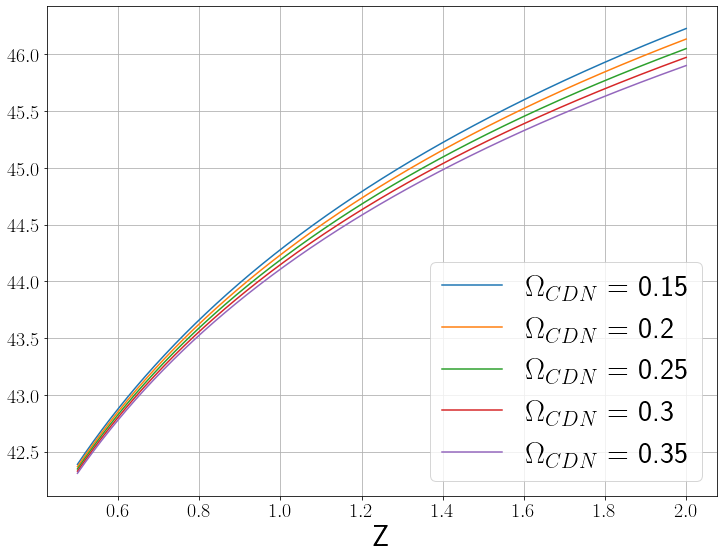

In [36]:
plt.figure(figsize=(12,9))
#plt.title(r"Módulo de Distância para diferentes valores de $\Omega_c$", fontsize=20)
for i in range(15, 40, 5):
    
    cosmo.param_set_by_name("Omegac", i/100)
    distancia.prepare(cosmo)
    modulo = np.array([distancia.dmodulus(cosmo, z) + (5 * np.log10(cosmo.RH_Mpc()) ) for z in z_a])
    
    plt.plot(z_a, modulo, label=r'$\Omega_{CDN}$ = ' + f"{i/100}")

plt.xlabel("Z", fontsize=30)
plt.tick_params(labelsize=20)
plt.legend(loc="best", fontsize=30)
plt.grid ()
#plt.savefig("m_c.pdf")
plt.show()

cosmo.param_set_by_name("Omegac", 0.2568) #Retorna a valor original

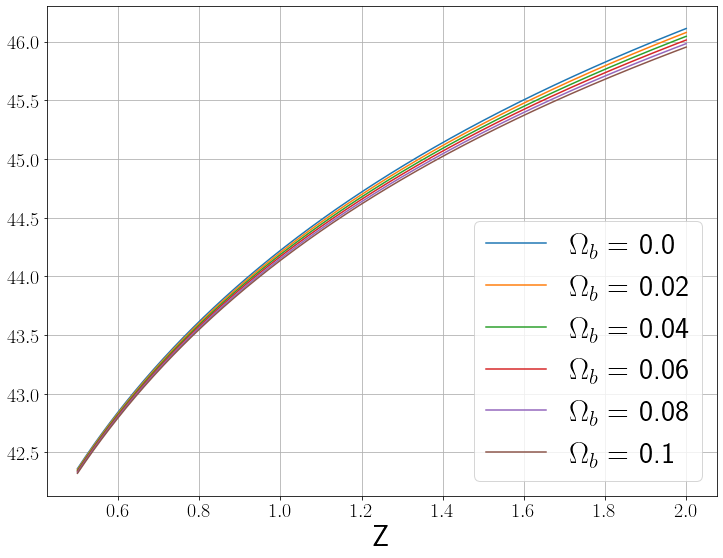

In [37]:
plt.figure(figsize=(12,9))
#plt.title(r"Módulo de Distância para diferentes valores de $\Omega_b$", fontsize=20)
for i in range(0, 12, 2):
    
    cosmo.param_set_by_name("Omegab", i/100)
    distancia.prepare(cosmo)
    modulo = np.array([distancia.dmodulus(cosmo, z) + (5 * np.log10(cosmo.RH_Mpc()) ) for z in z_a])
    
    plt.plot(z_a, modulo, label=r'$\Omega_{b}$ = ' + f"{i/100}")

plt.xlabel("Z", fontsize=30)
plt.tick_params(labelsize=20)
plt.legend(loc="best", fontsize=30)
plt.grid ()
#plt.savefig("m_b.pdf")
plt.show()


cosmo.param_set_by_name("Omegab", 0.0432) #Retorna a valor original